In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd gdrive/My Drive/Master Thesis/DeepRL

/content/gdrive/My Drive/Master Thesis/DeepRL


In [6]:
!ls -l

total 728
drwx------ 2 root root   4096 Nov  8 12:06 agents
-rw------- 1 root root 207686 Nov  8 17:48 Cartpole_DQN.ipynb
-rw------- 1 root root    422 Nov  8 13:24 Dockerfile
drwx------ 2 root root   4096 Nov  8 12:06 DQN_trained_models
drwx------ 2 root root   4096 Nov  8 12:07 helpers
-rw------- 1 root root 522166 Nov  8 12:08 Lunar_Lander_DQN.ipynb
-rw------- 1 root root    657 Nov  1 18:17 Presentation_1_Speaker_Notes.lnk
-rw------- 1 root root     48 Nov  8 11:59 README.md
-rw------- 1 root root     25 Nov  8 13:24 requirements.txt


In [7]:
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [8]:
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

     |████████████████████████████████| 448 kB 5.4 MB/s 
     |████████████████████████████████| 20.9 MB 59.7 MB/s 
     |████████████████████████████████| 861 kB 35.4 MB/s 
     |████████████████████████████████| 479 kB 40.8 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=e6b87d88fe1a0a787e55aeb6bb1d5b0f06f2aa80857d84c33b61aeef4b9388b7
  Stored in directory: /root/.cache/pip/wheels/a0/95/26/4cf34fb92765c95fb7851fd447511594bcc3a50e504bd09af9
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=42f2812621e33e4f087a155c627e567dba6dad8fca07119e2c8c2092ac47529b
  Stored in directory: /root/.cache/pip/wheels/8d/c4/b5/e4b61f624036f83566580d61f24af7b73180b1361ee1ab3722
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


## Imports

In [9]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *

Create DQN_Agent

In [10]:
agent= DQN_Agent(
                 env_name="CartPole-v1",
                 gamma=0.98,             ## 0.98 was good for Cartpole###############################
                 epsilon=1.0,
                 layer1_size=32, 
                 layer2_size=32,             
                 lr=0.001,               
                 mem_size=100000000,
                 batch_size=64,          #1024,    ########## with 1024 was good for Cartpole #######
                 epsilon_dec=0.0001,     #0.0003, ###### 0.0005 was OKAY not so good for Cartpole ###
                 epsilon_end=0.01,       #######_____________#####_____________________##############
                 reproduce_seed=None#42
                )

# If you want to first train an agent use this cell ❎

Eps: 2 ,  Eps steps: 33 ,Epsilon: 1.00, Ep_Reward : 33.00 , Average_Reward : 22.50

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Eps: 50 ,  Eps steps: 30 ,Epsilon: 0.90, Ep_Reward : 30.00 , Average_Reward : 21.22
 Agent trained.....

 Saving Model info.....

 CartPole-v1 Problem took 50 episodes


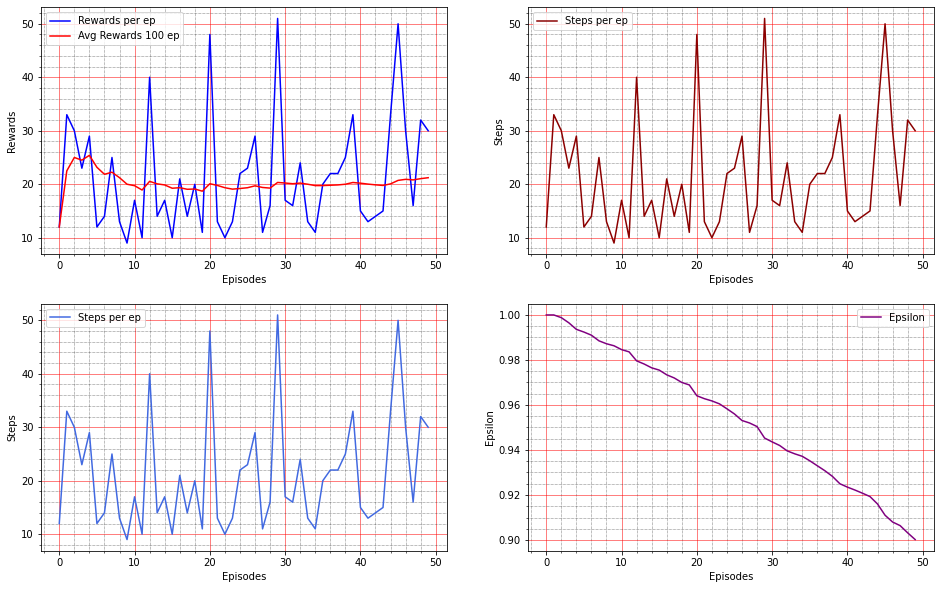

In [11]:
agent.train_multiple_episodes(num_episodes=50)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 62.0 , Steps 62
Tests # 900 , Rewards 53.0 , Steps 53
Tests # 930 , Rewards 67.0 , Steps 67
Tests # 180 , Rewards 38.0 , Steps 38
Tests # 660 , Rewards 33.0 , Steps 33
Tests # 240 , Rewards 88.0 , Steps 88
Tests # 960 , Rewards 44.0 , Steps 44
Tests # 450 , Rewards 65.0 , Steps 65
Tests # 30 , Rewards 60.0 , Steps 60
Tests # 90 , Rewards 28.0 , Steps 28
Tests # 150 , Rewards 64.0 , Steps 64
Tests # 210 , Rewards 27.0 , Steps 27
Tests # 330 , Rewards 60.0 , Steps 60
Tests # 420 , Rewards 46.0 , Steps 46
Tests # 510 , Rewards 76.0 , Steps 76
Tests # 75 , Rewards 38.0 , Steps 38


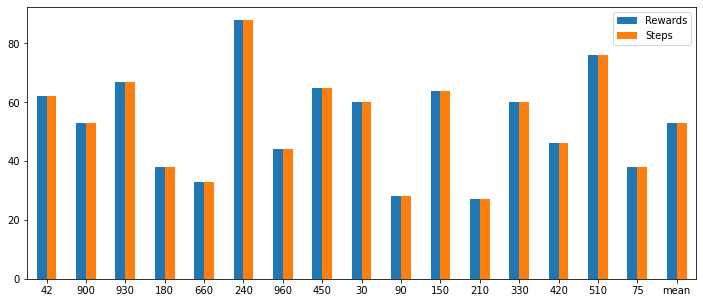

In [12]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

# If you want to use a pretrained model use this cell ❎

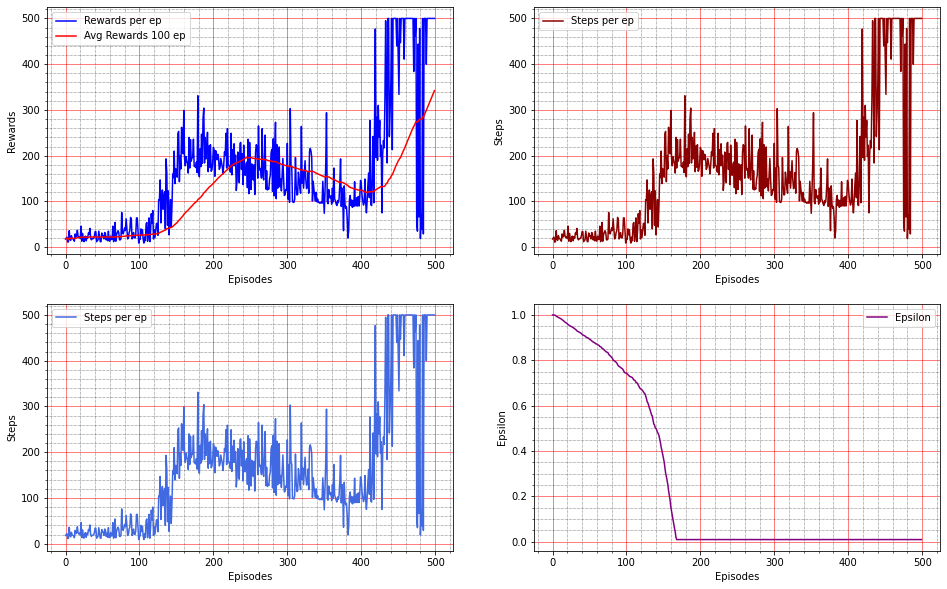

In [8]:
if not agent.trained:
  model_suffix="20211108-082804"
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)


### Render the 16 Test Case gif's : ⏩

In [60]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x82\x00\x00\x00\x00\x00\xcc\x99fff\xcc\x99\x99\xcc\…